## Togo

# 0. File Structure setup

In [40]:
import sys, pathlib
sys.path.append(str(pathlib.Path.cwd().parent / 'src'))
import importlib, solar_eda as eda
importlib.reload(eda)

RAW = "../data/raw/togo.csv"
CLEAN = "../data/togo_clean.csv"

# 1. Load & profile

In [41]:

df_raw = eda.load_raw(RAW)
desc, nulls = eda.profile(df_raw)
display(desc); display(nulls.sort_values(ascending=False).head())

,count,mean,min,25%,50%,75%,max,std
Timestamp,525600,2022-04-25 12:00:30.000000768,2021-10-25 00:01:00,2022-01-24 06:00:45,2022-04-25 12:00:30,2022-07-25 18:00:15,2022-10-25 00:00:00,NaN
GHI,525600.0,230.55504,-12.7,-2.2,2.1,442.4,1424.0,322.532347
DNI,525600.0,151.258469,0.0,0.0,0.0,246.4,1004.5,250.956962
DHI,525600.0,116.444352,0.0,0.0,2.5,215.7,805.7,156.520714
ModA,525600.0,226.144375,0.0,0.0,4.4,422.525,1380.0,317.346938
ModB,525600.0,219.568588,0.0,0.0,4.3,411.0,1367.0,307.93251
Tamb,525600.0,27.751788,14.9,24.2,27.2,31.1,41.4,4.758023
RH,525600.0,55.01316,3.3,26.5,59.3,80.8,99.8,28.778732
WS,525600.0,2.368093,0.0,1.4,2.2,3.2,16.1,1.462668
WSgust,525600.0,3.22949,0.0,1.9,2.9,4.4,23.1,1.882565


Comments     100.0
GHI            0.0
Timestamp      0.0
DNI            0.0
DHI            0.0
dtype: float64

In [42]:
eda.dtype_summary(df_raw)


,dtype,non-null,missing,% missing,memory_mb
BP,int64,525600.0,0.0,0.0,4.01
Cleaning,int64,525600.0,0.0,0.0,4.01
Comments,float64,0.0,525600.0,1.0,4.01
DHI,float64,525600.0,0.0,0.0,4.01
DNI,float64,525600.0,0.0,0.0,4.01
GHI,float64,525600.0,0.0,0.0,4.01
ModA,float64,525600.0,0.0,0.0,4.01
ModB,float64,525600.0,0.0,0.0,4.01
RH,float64,525600.0,0.0,0.0,4.01
Precipitation,float64,525600.0,0.0,0.0,4.01


In [43]:
eda.numeric_overview(df_raw)


,count,mean,min,25%,50%,75%,max,std
Timestamp,525600.000,.3f,.3f,.3f,.3f,.3f,.3f,nan
GHI,525600.000,230.555,-12.700,-2.200,2.100,442.400,1424.000,322.532
DNI,525600.000,151.258,0.000,0.000,0.000,246.400,1004.500,250.957
DHI,525600.000,116.444,0.000,0.000,2.500,215.700,805.700,156.521
ModA,525600.000,226.144,0.000,0.000,4.400,422.525,1380.000,317.347
ModB,525600.000,219.569,0.000,0.000,4.300,411.000,1367.000,307.933
Tamb,525600.000,27.752,14.900,24.200,27.200,31.100,41.400,4.758
RH,525600.000,55.013,3.300,26.500,59.300,80.800,99.800,28.779
WS,525600.000,2.368,0.000,1.400,2.200,3.200,16.100,1.463
WSgust,525600.000,3.229,0.000,1.900,2.900,4.400,23.100,1.883


In [44]:
eda.cat_counts(df_raw, top=50)


{}

In [45]:
eda.missing_table(df_raw, mv_thresh=0.05)


,missing,% missing
Comments,525600,1.0


In [46]:
eda.dup_report(df_raw)


(np.int64(0),
 Empty DataFrame
 Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, Comments]
 Index: [])

# 2. Data Cleaning 

In [47]:
df_clean = eda.clean_solar_df(df_raw, save_path=CLEAN)

Dropping columns (≥100 % null): ['Comments']
Setting 255154 negative irradiance readings to 0 (night-time rows).
Dropped outliers: 9257
Saved cleaned dataframe → ../data/togo_clean.csv


In [48]:
eda.dtype_summary(df_clean)


,dtype,non-null,missing,% missing,memory_mb
BP,int64,516343.0,0.0,0.0,3.939
Cleaning,int64,516343.0,0.0,0.0,3.939
DHI,float64,516343.0,0.0,0.0,3.939
DNI,float64,516343.0,0.0,0.0,3.939
GHI,float64,516343.0,0.0,0.0,3.939
HasRain,int64,516343.0,0.0,0.0,3.939
Index,NaN,NaN,NaN,NaN,3.939
ModA,float64,516343.0,0.0,0.0,3.939
ModB,float64,516343.0,0.0,0.0,3.939
Precipitation,float64,516343.0,0.0,0.0,3.939


In [49]:
eda.numeric_overview(df_clean)


,count,mean,min,25%,50%,75%,max,std
Timestamp,516343.000,.3f,.3f,.3f,.3f,.3f,.3f,nan
GHI,516343.000,225.022,-5.700,0.000,0.500,423.200,1196.000,316.454
DNI,516343.000,147.969,0.000,0.000,0.000,237.900,904.100,247.677
DHI,516343.000,112.777,0.000,0.000,1.500,211.600,586.000,151.568
ModA,516343.000,219.370,0.000,0.000,2.800,404.100,1171.200,311.842
ModB,516343.000,213.018,0.000,0.000,2.800,393.050,1143.000,302.612
Tamb,516343.000,27.727,14.900,24.200,27.200,31.000,41.400,4.757
RH,516343.000,55.183,3.300,26.800,59.400,81.000,99.800,28.698
WS,516343.000,2.312,0.000,1.400,2.200,3.200,6.700,1.378
WSgust,516343.000,3.154,0.000,1.900,2.900,4.100,8.800,1.762


In [50]:
eda.cat_counts(df_clean, top=50)


{}

In [51]:
eda.missing_table(df_clean, mv_thresh=0.05)


,missing,% missing


In [52]:
eda.dup_report(df_clean)


(np.int64(0),
 Empty DataFrame
 Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, HasRain, Hour, Month]
 Index: []
 
 [0 rows x 21 columns])

# 3. Visualzations


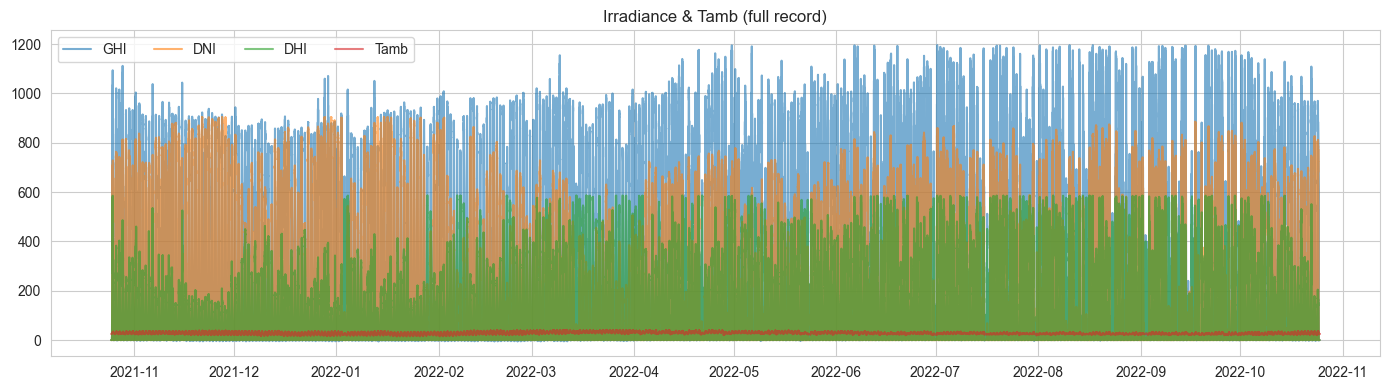

In [53]:
import matplotlib.pyplot as plt
eda.line_overview(df_clean); plt.show()

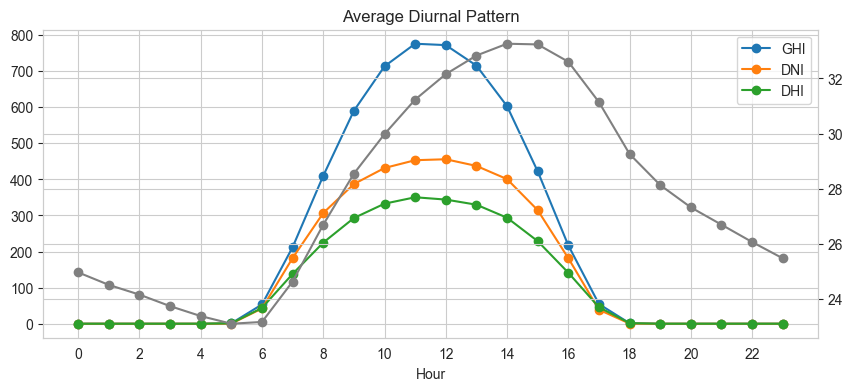

In [54]:
eda.diurnal_curve(df_clean); plt.show()


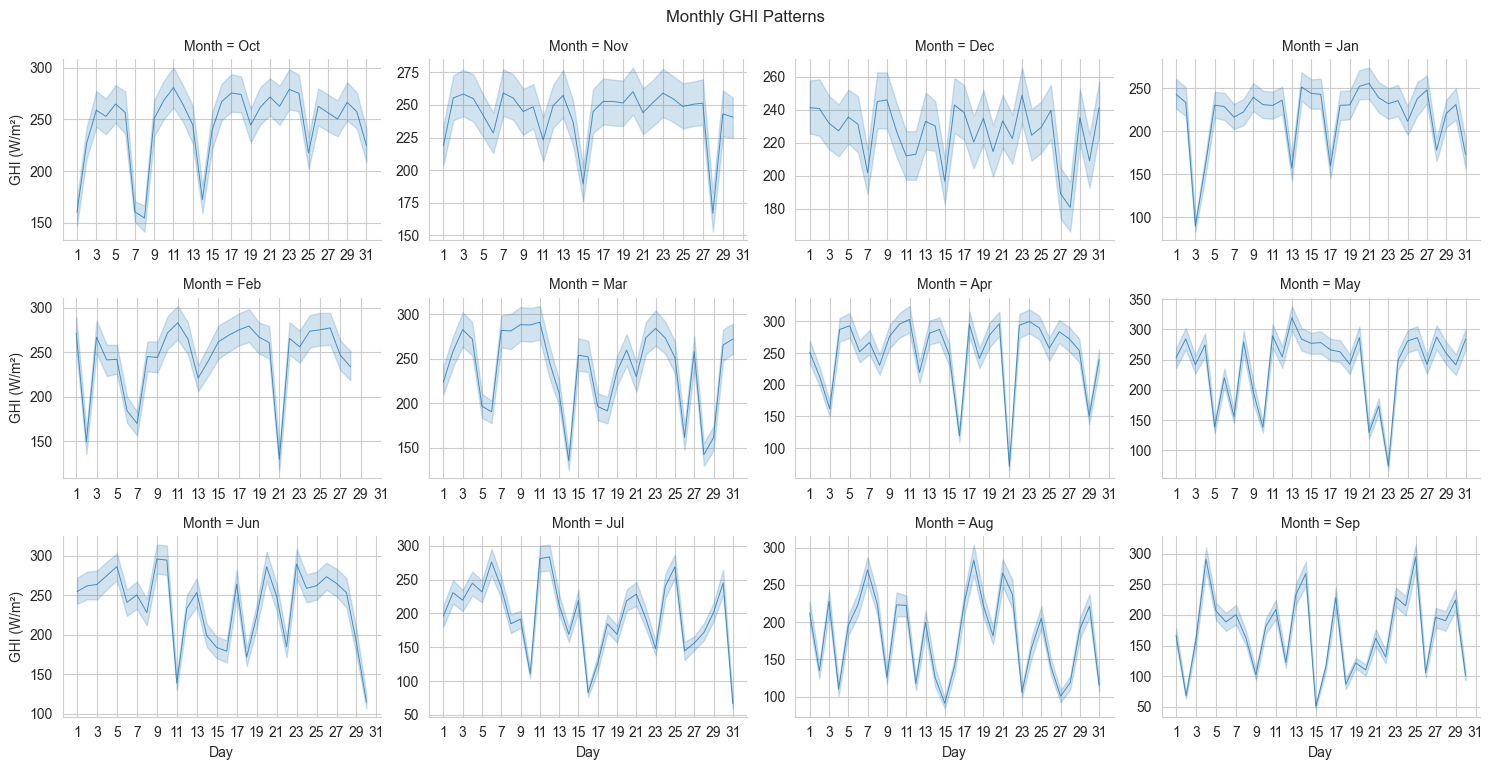

In [55]:
eda.monthly_facets(df_clean); plt.show()

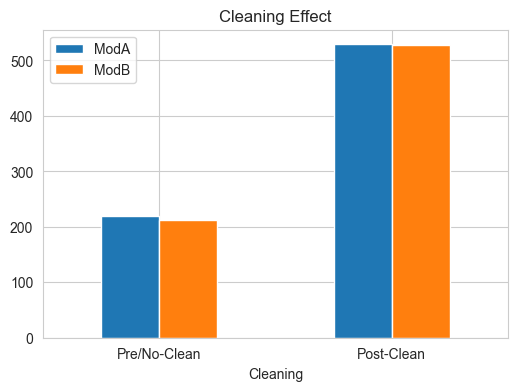

,ModA,ModB
Cleaning,,
Pre/No-Clean,219.2,212.9
Post-Clean,528.9,527.3


In [56]:
ax, impact = eda.cleaning_impact(df_clean); plt.show(); display(impact)


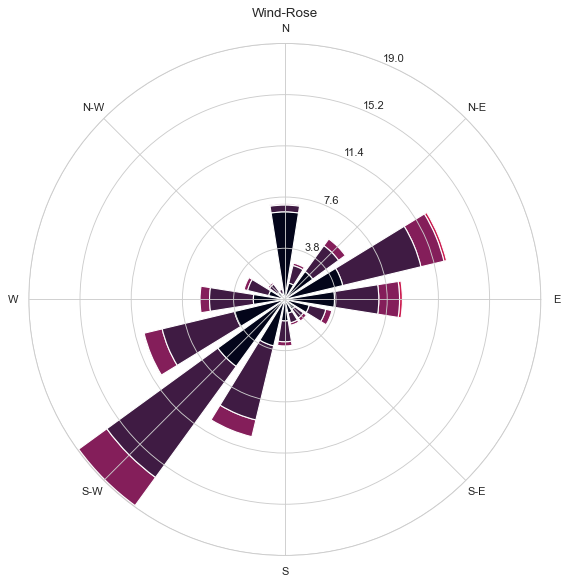

In [57]:
eda.wind_rose(df_clean); plt.show()


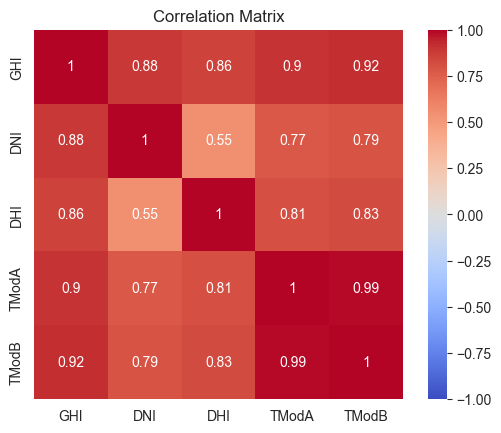

In [58]:
eda.corr_heatmap(df_clean); plt.show()


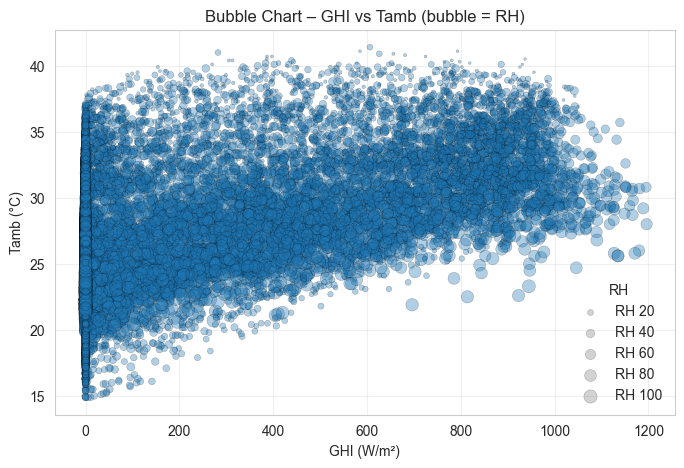

In [59]:
ax = eda.bubble_ghi_tamb(df_clean, size_col="RH")
plt.show() 

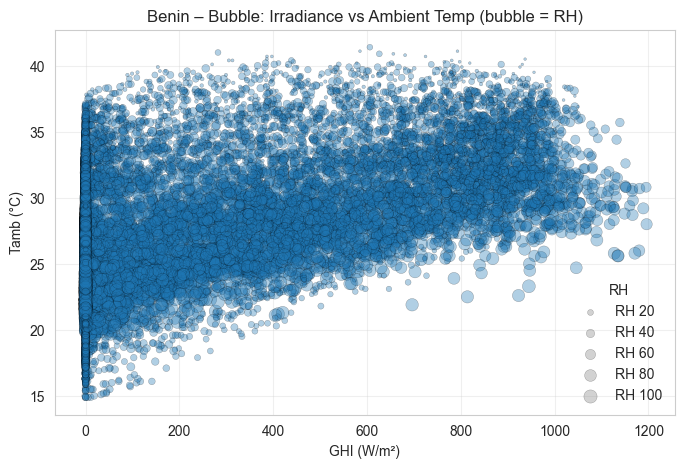

In [61]:
ax = eda.bubble_ghi_tamb(
    df_clean,        
    size_col="RH",      
    n=20_000,           
    size_scale=0.9,
    title="Benin – Bubble: Irradiance vs Ambient Temp (bubble = RH)"
)
plt.show()